In [1]:
import sys
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import logging
logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")

import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.visualize import Visualize

from MaskRCNN.main import Inference

%matplotlib inline 

pretrained_weights_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
save_dir = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/'

Using TensorFlow backend.


In [2]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run fcn_rpn_proposal generation

In [3]:
# obj_inference = Inference(pretrained_weights_path, run='fpn_rcn_proposals', save=True, save_dir=save_dir, DEBUG=False)
# feature_maps, proposals, image_metas = obj_inference.get_feature_maps_and_proposals()
# print (len(feature_maps), proposals.shape, image_metas)

## Run mrcnn_detections generation

In [4]:
obj_inference = Inference(pretrained_weights_path, run='mrcnn_detection', save=True, save_dir=save_dir, DEBUG=False)
mrcnn_class_probs, mrcnn_bbox, detections, detection_unmold = obj_inference.get_mrcnn_prob_bbox_and_detections()

Max and Min Proposals,  1.0 0.0
Num NaN present in Proposals  0
(MRCNN) feature_map (len)  4
(MRCNN) proposals (shape)  (1, 1000, 4)
1 [[476 640   3]] [[1024 1024    3]] [[ 131    0  893 1024]]
(MRCNN) Pooled Roi's (shape) (1, ?, 7, 7, 256)
window  [[ 0.12805474  0.          0.87194526  1.        ]]
RUNNING DetectionLayer ......................
RUNNING utils (batch_slice)......................
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
RUNNING refine_detections_graph ......................
RUNNING apply_box_deltas_graph ......................
RUNNING clip_boxes_graph ......................
(MASK RCNN) mrcnn_class_probs (shape) (1, 1000, 81)
(MASK RCNN) mrcnn_bbox (shape) (1, 1000, 81, 4)
(DETECTION) detections (shape) (1, 100, 6)
image_shape  [1024 1024    3]
original_image_shape  [476 640   3]
image_window  [ 131    0  893 1024]
image_window_normeed:  [ 0.12805474  0.          0.87194526  1.        ]
(100, 6)
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 2

In [5]:
detection_unmold

[array([[-82,   0, -81,   1],
        [-82,   0, -81,   1],
        [-82,   0, -81,   1],
        [-82,   0, -81,   1]], dtype=int32)]

## Vizualize Detections

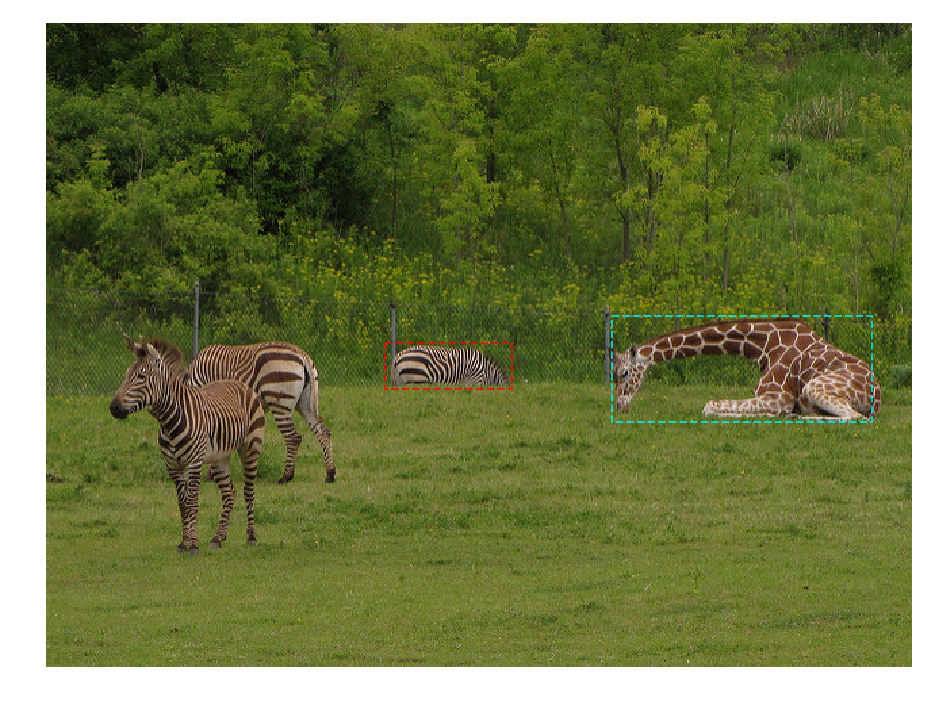

In [5]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'
Visualize(img_path).visualize_boxes(boxes=detection_unmold[0], class_names=class_names)